In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Covariance
Covariance is a measure of the tendency of two variables to vary together.<br>
If we have two series, X and Y, their deviations from the mean are
![](assets/images/cov-deviations.PNG)
Covariance is the mean of these products:
![](assets/images/cov-formula.PNG)
where n is the length of the two series (they have to be the same length)

In [102]:
X = np.random.rand(50)
Y = np.random.rand(50)

np.cov(X, Y)[0, 1]

array([[ 0.09492563, -0.00780358],
       [-0.00780358,  0.09846717]])

Covariance is useful for some calculations, but it doesn't mean much by itself.

In [22]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0, 1]

0.16498713636061424

The coefficient of correlation is a standardized version of covariance that is easier to interpret.

# Correlation
A correlation is a statistic intended to quantify the strength of the relationship between two variables.<br>


### Pearson’s Correlation
Divide the deviations by the standard deviation, which yields standard scores(dimensionless scores), and compute the product of standard scores:
![](assets/images/corr-pearson-product.PNG)
The mean of these products is
![](assets/images/corr-pearson-mean.PNG)
In terms of covaiance:
![](assets/images/corr-pearson-cov.PNG)
- The value lies between -1 and +1<br>
- If ρ is positive, the correlation is positive
- If ρ is negative, the correlation is negative
- The magnitude of ρ indicates the strength of the correlation


In [20]:
# X = [1,2,3,4,5,6,7,8,9]
# Y = [2,1,2,4.5,7,6.5,6,9,9.5]

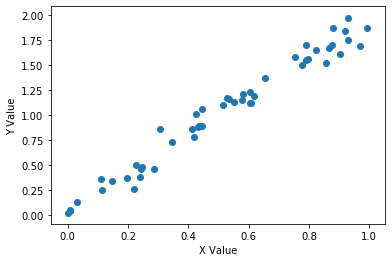

In [45]:
plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()

In [24]:
print('Covariance of X and Y: %.2f'%np.cov(X, Y)[0, 1])
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

Covariance of X and Y: 0.16
Correlation of X and Y: 0.99


What if Pearson’s correlation is near 0?<br> 
It is tempting to conclude that there is no relationship between the variables, but that conclusion is not valid. 
- Pearson’s correlation only measures linear relationships<br>
<br>
<b>Examples of datasets with a range of correlations</b>
![](assets/images/corr-pearson-examples.png)

### Spearman’s Rank Correlation
Pearson’s correlation works well if the relationship between variables is linear and if the variables are roughly normal. But it is not robust in the presence of outliers.<br>
Spearman’s rank correlation is an alternative that mitigates the effect of outliers and skewed distributions as well as non-linearity. 

In [29]:
scipy.stats.spearmanr(X, Y)[0]

0.9825210084033614

<b>Examples</b>

In [96]:
x = np.array([1,2,3,4,5,6])
y_linear_inc =  2 * x
y_mon_inc = np.array([4,5,5.1,5.2,7.01,8.95])
y_mon_dec = np.array([1, 0.75, 0.7499, 0.2, -.5, -2.5])
y_log = np.log(1/x)
y_par = np.sqrt(4*x)

x, y_linear_inc, y_mon_inc, y_mon_dec, y_log, y_par

(array([1, 2, 3, 4, 5, 6]),
 array([ 2,  4,  6,  8, 10, 12]),
 array([4.  , 5.  , 5.1 , 5.2 , 7.01, 8.95]),
 array([ 1.    ,  0.75  ,  0.7499,  0.2   , -0.5   , -2.5   ]),
 array([ 0.        , -0.69314718, -1.09861229, -1.38629436, -1.60943791,
        -1.79175947]),
 array([2.        , 2.82842712, 3.46410162, 4.        , 4.47213595,
        4.89897949]))

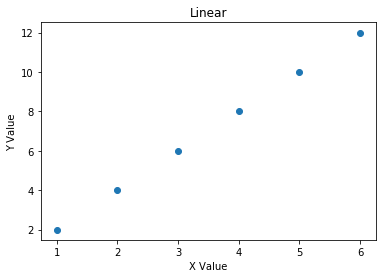

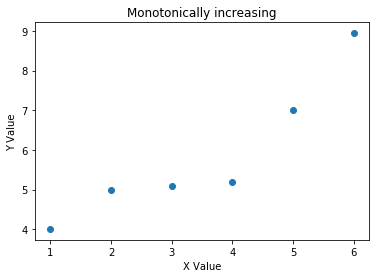

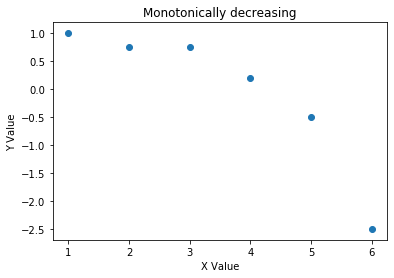

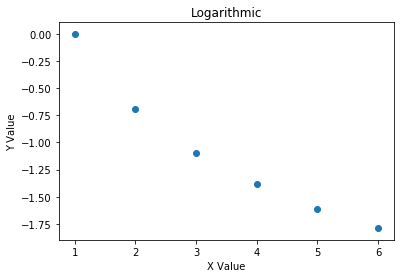

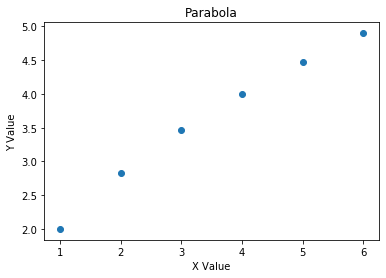

In [97]:
plt.scatter(x,y_linear_inc)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Linear')
plt.show()

plt.scatter(x,y_mon_inc)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Monotonically increasing')
plt.show()

plt.scatter(x,y_mon_dec)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Monotonically decreasing')
plt.show()

plt.scatter(x,y_log)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Logarithmic')
plt.show()

plt.scatter(x,y_par)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Parabola')
plt.show()

In [98]:
print('Pearson Correlation for linear: %.2f'%np.corrcoef(x, y_linear_inc)[0, 1])
print('Spearman Correlation for linear: %.2f'%scipy.stats.spearmanr(x, y_linear_inc)[0])

print('Pearson Correlation for monotonic increasing: %.2f'%np.corrcoef(x, y_mon_inc)[0, 1])
print('Spearman Correlation for monotonic increasing: %.2f'%scipy.stats.spearmanr(x, y_mon_inc)[0])

print('Pearson Correlation for monotonic decreasing: %.2f'%np.corrcoef(x, y_mon_dec)[0, 1])
print('Spearman Correlation for monotonic decreasing: %.2f'%scipy.stats.spearmanr(x, y_mon_dec)[0])

print('Pearson Correlation for logarithmic: %.2f'%np.corrcoef(x, y_log)[0, 1])
print('Spearman Correlation for logarithmic: %.2f'%scipy.stats.spearmanr(x, y_log)[0])

print('Pearson Correlation for parabola: %.2f'%np.corrcoef(x, y_par)[0, 1])
print('Spearman Correlation for parabola: %.2f'%scipy.stats.spearmanr(x, y_par)[0])

Pearson Correlation for linear: 1.00
Spearman Correlation for linear: 1.00
Pearson Correlation for monotonic increasing: 0.92
Spearman Correlation for monotonic increasing: 1.00
Pearson Correlation for monotonic decreasing: -0.89
Spearman Correlation for monotonic decreasing: -1.00
Pearson Correlation for logarithmic: -0.97
Spearman Correlation for logarithmic: -1.00
Pearson Correlation for parabola: 0.99
Spearman Correlation for parabola: 1.00


# Causation
If variables A and B are correlated, there are three possible explanations: A causes B, or B causes A, or some other set of factors causes both A and B
<b>Correlation does not imply causation</b>